In [1]:
# Importing Basic Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns




In [2]:

file_path = "C:\\Users\\Kevin\\Desktop\\laptop_price.csv"

# Try using a different encoding, like 'ISO-8859-1' or 'cp1252'
try:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='cp1252')

# Display the first five rows of the DataFrame
print(df.head())

# Display the column names of the DataFrame
print(df.columns)


   laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   

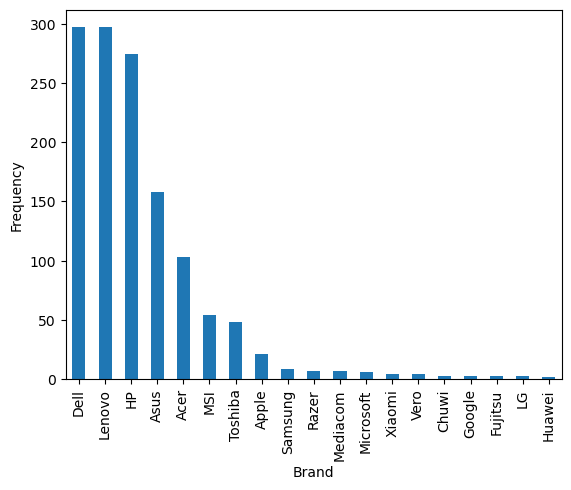

In [3]:
# Count the occurrences of each brand and plot a bar chart
df['Company'].value_counts().plot(kind='bar')

# Set the titles for the axes
plt.xlabel('Brand')
plt.ylabel('Frequency')

# Display the plot
plt.show()



In [4]:
# Checking for missing values in each column of the DataFrame
missing_values = df.isnull().sum()
print(missing_values)

# Checking for duplicated rows in the DataFrame
duplicated_rows = df.duplicated().sum()
print(duplicated_rows)


laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64
0


In [5]:
# Data cleaning: removing units and converting data types
# Ensure that 'Ram' and 'Weight' columns are treated as strings
df['Ram'] = df['Ram'].astype(str)
df['Weight'] = df['Weight'].astype(str)

# Now, apply the string replacement and convert to int and float respectively
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)


# Check if 'laptop_ID' exists in the DataFrame
if 'laptop_ID' in df.columns:
    df.drop(columns=['laptop_ID'], inplace=True)
else:
    print("Column 'laptop_ID' does not exist in the DataFrame.")

# Rename Price_euros to Price
df.rename(columns={'Price_euros': 'Price'}, inplace=True)


# Displaying the DataFrame's info to confirm changes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(8)
memory usage: 117.2+ KB


C:\Users\Kevin\AppData\Local\Temp\ipykernel_9580\1676118866.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'], color='red')


<Axes: xlabel='Price', ylabel='Density'>

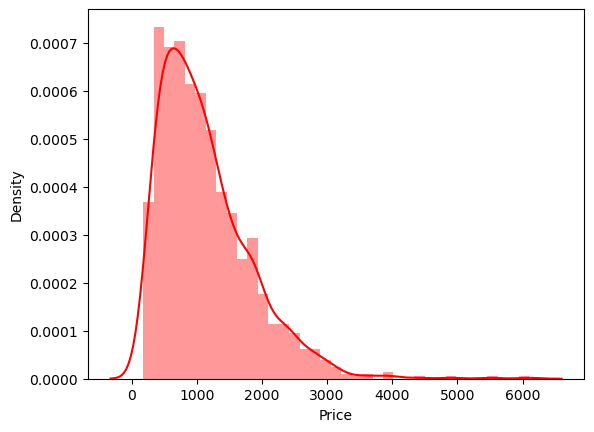

In [6]:
# Viewing the distribution of the price column
sns.distplot(df['Price'], color='red')



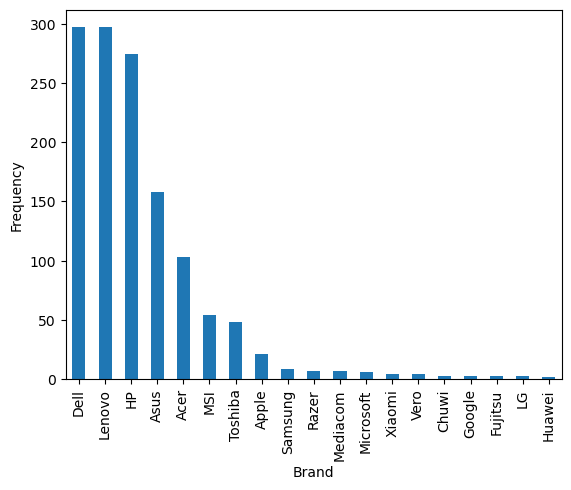

In [7]:
# Count the occurrences of each brand and plot a bar chart
df['Company'].value_counts().plot(kind='bar')

# Set the titles for the axes
plt.xlabel('Brand')
plt.ylabel('Frequency')

# Display the plot
plt.show()


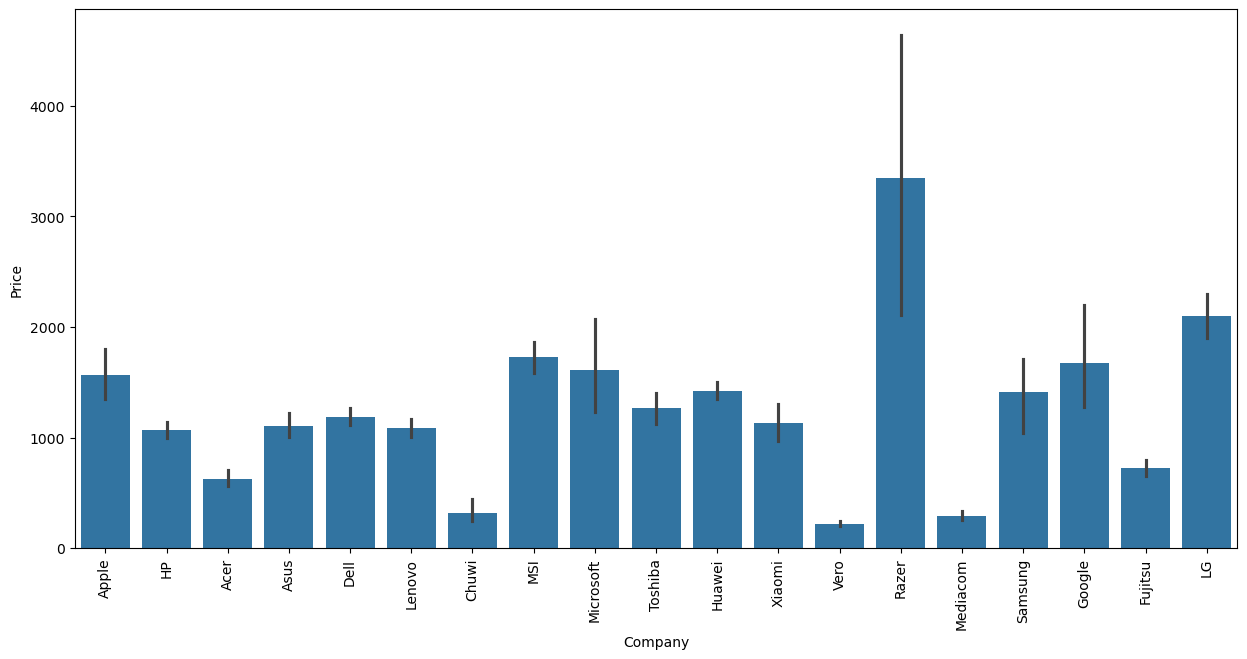

In [8]:
# Set the figure size for the plot
plt.figure(figsize=(15,7))

# Create a bar plot to show the average price for each laptop brand
sns.barplot(x=df['Company'], y=df['Price'])

# Rotate the x-axis labels to make them readable
plt.xticks(rotation='vertical')

# Display the plot
plt.show()


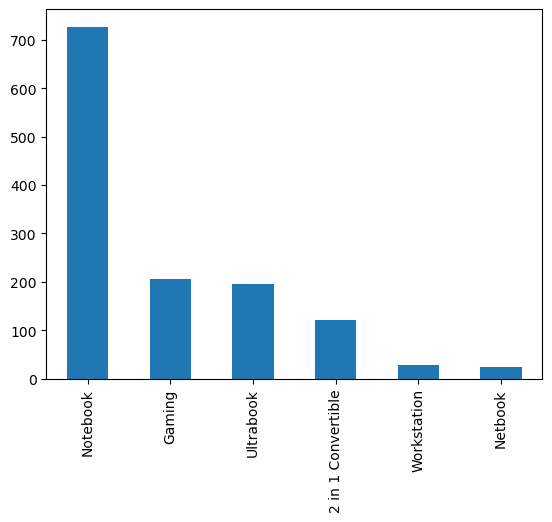

In [9]:
# Ensure the 'TypeName' column is of type string
df['TypeName'] = df['TypeName'].astype('str')

# Count the occurrences of each type and plot a bar plot
df['TypeName'].value_counts().plot(kind='bar')

# Rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


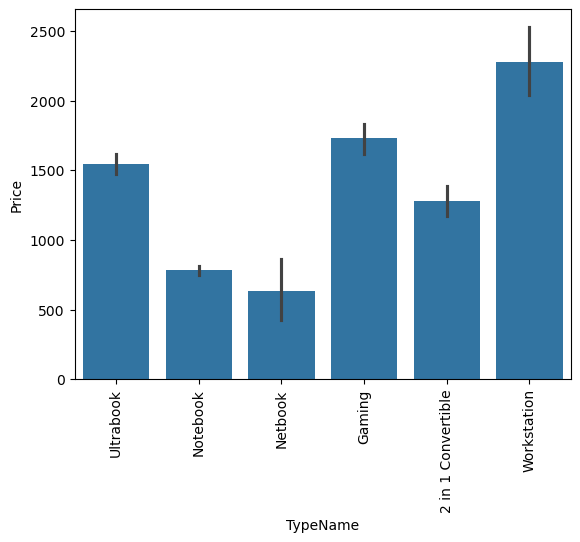

In [10]:
# Laptop type and variation about the price
sns.barplot(x=df['TypeName'], y=df['Price'])

# Rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


C:\Users\Kevin\AppData\Local\Temp\ipykernel_9580\2167385923.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


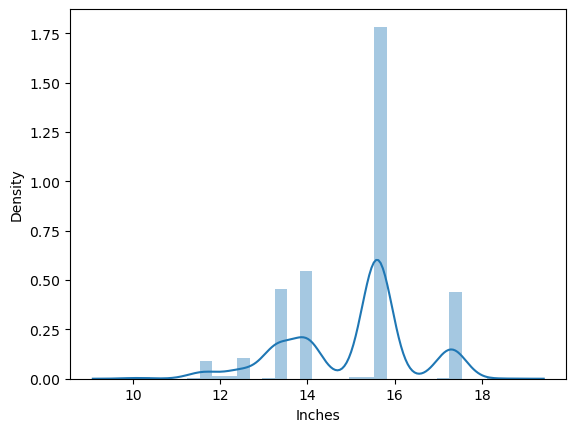

In [11]:
# Variation of inches
sns.distplot(df['Inches'])

# Display the plot
plt.show()


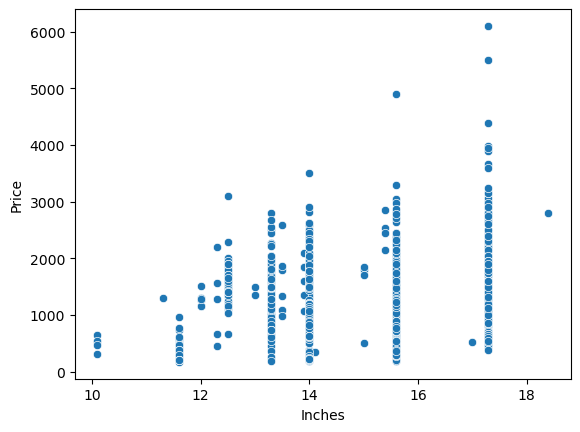

In [12]:
# Creating a scatter plot of 'Inches' vs 'Price'
sns.scatterplot(x="Inches", y="Price", data=df)

# Show the plot
plt.show()


In [13]:
screen_resolution_counts = df['ScreenResolution'].value_counts()
print(screen_resolution_counts)

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [14]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if "Touchscreen" in x else 0)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())


  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight    Price  Touchscreen  
0  Intel Iris Plus Graphics 640  macOS    1.37  1339.69            0  
1        Intel H

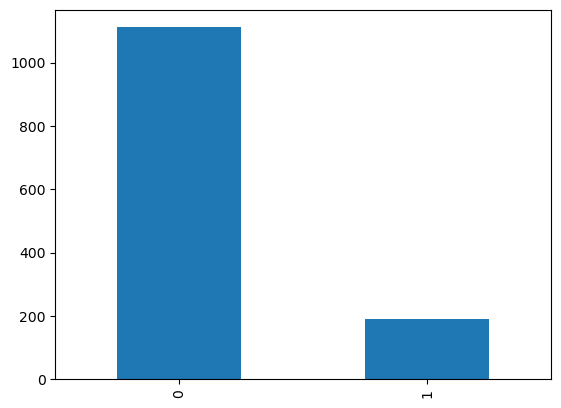

In [15]:
# Count the values of the 'Touchscreen' column and plot a bar plot
df['Touchscreen'].value_counts().plot(kind='bar')

# Display the plot
plt.show()


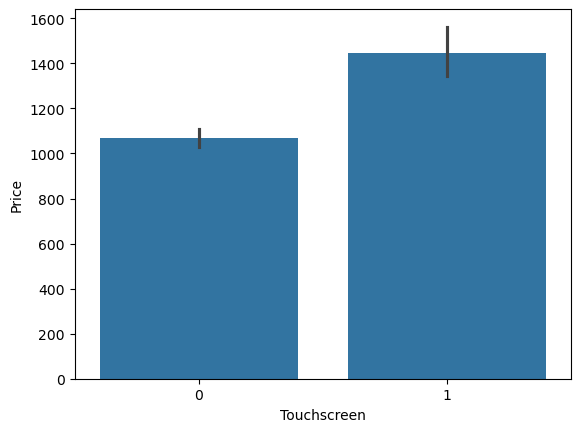

In [16]:
# Creating a bar plot to show the average price for laptops with and without touchscreens
sns.barplot(x=df['Touchscreen'], y=df['Price'])

# Setting the labels for the plot
plt.xlabel('Touchscreen')
plt.ylabel('Price')

# Display the plot
plt.show()


In [17]:
# Add a new column 'IPS' based on the 'ScreenResolution' column
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if "IPS" in x else 0)

# Display the first few rows of the DataFrame to verify the changes
df.head()


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1


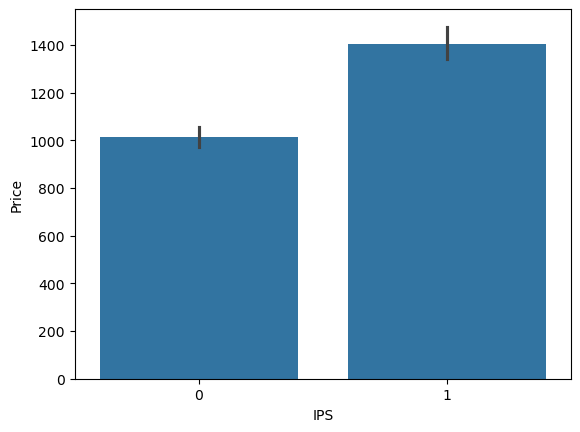

In [18]:
# Creating a bar plot to show the average price for laptops with and without IPS screens
sns.barplot(x=df['IPS'], y=df['Price'])

# Setting the labels for the plot
plt.xlabel('IPS')
plt.ylabel('Price')

# Display the plot
plt.show()


In [19]:
# Split the 'ScreenResolution' column into two separate components at 'x'
resolution_split = df['ScreenResolution'].str.split("x", expand=True)

# Display the split results
print(resolution_split)


                                          0     1
0             IPS Panel Retina Display 2560  1600
1                                      1440   900
2                              Full HD 1920  1080
3             IPS Panel Retina Display 2880  1800
4             IPS Panel Retina Display 2560  1600
...                                     ...   ...
1298   IPS Panel Full HD / Touchscreen 1920  1080
1299  IPS Panel Quad HD+ / Touchscreen 3200  1800
1300                                   1366   768
1301                                   1366   768
1302                                   1366   768

[1303 rows x 2 columns]


In [20]:
# Calculate the correlation matrix
#numeric_df = df.select_dtypes(include=[np.number])
#corr_matrix = numeric_df.corr()

#df = pd.get_dummies(df, columns=['TypeName'], drop_first=True)
#corr_matrix = df.corr()


#corr_matrix = df.corr()

# Set the figure size
#plt.figure(figsize=(15,7))

# Create the heatmap with the correlation matrix
#sns.heatmap(corr_matrix, annot=True, cmap='plasma')

# Display the heatmap
#plt.show()


In [21]:
# Calculate the correlation of 'Price' with all other columns
#price_correlation = df.corr()['Price']

# Display the correlation values
#print(price_correlation)


In [22]:
# Split 'ScreenResolution' into two new columns 'X_res' and 'Y_res'
temp = df['ScreenResolution'].str.split("x", n=1, expand=True)
df['X_res'] = temp[0]
df['Y_res'] = temp[1]

# Display the first few rows of the DataFrame to verify the new columns
df.head()


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Full HD 1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,IPS Panel Retina Display 2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,IPS Panel Retina Display 2560,1600


In [23]:
# Extract the horizontal resolution using a regular expression and create a new column 'X_res'
df['X_res'] = df['ScreenResolution'].str.replace(',', '.').str.findall(r'(\d+\.?\d*)').apply(lambda x: x[0])

# Display the first few rows of the DataFrame to verify the new column
df.head()


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [24]:
# Convert 'X_res' and 'Y_res' to integers
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

# Display DataFrame information to confirm the data type changes
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price             1303 non-null   float64
 12  Touchscreen       1303 non-null   int64  
 13  IPS               1303 non-null   int64  
 14  X_res             1303 non-null   int32  
 15  Y_res             1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(

In [25]:
# Calculate PPI
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5 / df['Inches']).astype('float')

# Calculate the correlation of 'Price' with other numerical features including 'ppi'
#price_correlation = df.corr()['Price']

# Display the correlation values
#print(price_correlation)


In [26]:
# Regex operation to extract numbers (assuming it's already been applied to 'X_res')

# Dropping unnecessary columns from the DataFrame
df.drop(columns=["ScreenResolution", "X_res", "Y_res", "Inches"], inplace=True)

# Display the first few rows of the DataFrame
df.head()


,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005


In [27]:
df["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [28]:
# Simplify the CPU names to the first two words
df['Cpu Name'] = df['Cpu'].apply(lambda x: " ".join(x.split()[:2]))

# Display the first few rows to verify the changes
df.head()


,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core


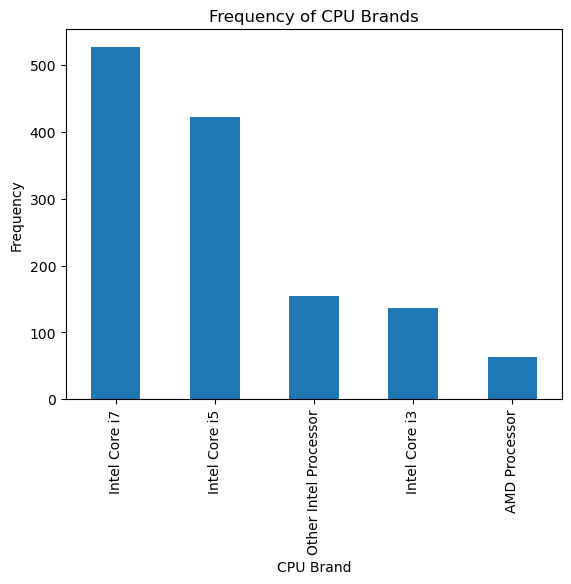

In [29]:
# Define a function to categorize the processor type
def categorize_processor(cpu):
    if 'i7' in cpu:
        return 'Intel Core i7'
    elif 'i5' in cpu:
        return 'Intel Core i5'
    elif 'i3' in cpu:
        return 'Intel Core i3'
    elif 'Intel' in cpu:
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

# Assuming 'df' is your DataFrame and 'Cpu' is the column with the CPU information

# Apply the function to create a new column 'Cpu Brand'
df['Cpu Brand'] = df['Cpu'].apply(categorize_processor)

# Calculate the frequency of each processor type
cpu_brand_counts = df['Cpu Brand'].value_counts()

# Plot the frequencies
cpu_brand_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('CPU Brand')
plt.ylabel('Frequency')
plt.title('Frequency of CPU Brands')

# Show the plot
plt.show()



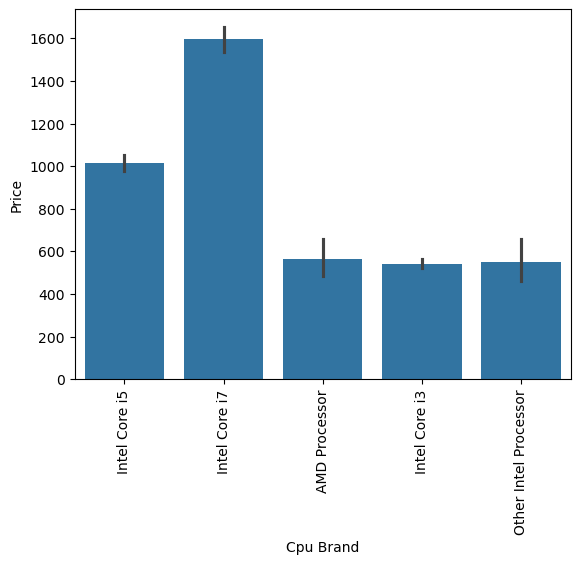

In [30]:
# Create a bar plot to show the average price for each CPU brand
sns.barplot(x=df['Cpu Brand'], y=df['Price'])

# Rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [31]:
# Drop the 'Cpu' and 'Cpu Name' columns
df.drop(columns=['Cpu', 'Cpu Name'], inplace=True)

# Display the first few rows of the DataFrame to verify the changes
df.head()


,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand
0,Apple,MacBook Pro,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


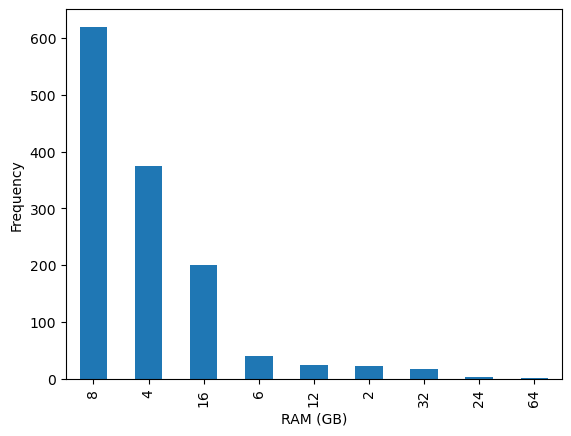

In [32]:
# Count the occurrences of each RAM amount and plot a bar chart
df['Ram'].value_counts().plot(kind='bar')

# Set the titles for the axes
plt.xlabel('RAM (GB)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


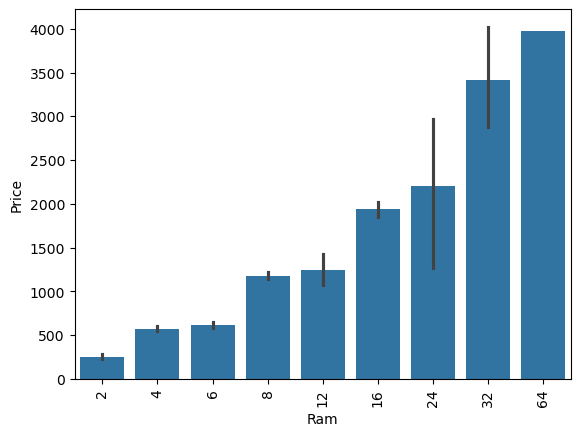

In [33]:
# Create a bar plot to show the average price for each amount of RAM
sns.barplot(x=df['Ram'], y=df['Price'])

# Rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [34]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [35]:
import pandas as pd


# Data cleanup
df['Memory'] = df['Memory'].str.replace('GB', '', regex=True)
df['Memory'] = df['Memory'].str.replace('TB', '000', regex=True)
df['Memory'] = df['Memory'].str.replace('.', '', regex=True)

# Splitting Memory Column
new = df['Memory'].str.split("+", n=1, expand=True)
df['first'] = new[0]
df['second'] = new[1]

# Strip whitespace if any
df['first'] = df['first'].str.strip()
df['second'] = df['second'].str.strip()

# Creating Flag Columns for Memory Types using the 'first' column
df['Layer1HDD'] = df['first'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Fill 'second' column NaNs with "0"
df['second'].fillna("0", inplace=True)

# Creating Flag Columns for Memory Types using the 'second' column
df['Layer2HDD'] = df['second'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Clean up 'first' and 'second' to be integers
df['first'] = df['first'].str.replace(r'\D', '', regex=True).astype(int)
df['second'] = df['second'].str.replace(r'\D', '', regex=True).astype(int)

# Combine the storage data
df['HDD'] = (df['first']*df['Layer1HDD']) + (df['second']*df['Layer2HDD'])
df['SSD'] = (df['first']*df['Layer1SSD']) + (df['second']*df['Layer2SSD'])
df['Hybrid'] = (df['first']*df['Layer1Hybrid']) + (df['second']*df['Layer2Hybrid'])
df['Flash_Storage'] = (df['first']*df['Layer1Flash_Storage']) + (df['second']*df['Layer2Flash_Storage'])

# Drop intermediate columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 
                 'Layer2Flash_Storage'], inplace=True)

# Display the modified DataFrame
df.head()


,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,MacBook Pro,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Macbook Air,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,250 G6,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,0,0


In [36]:
# Drop the 'Memory' column
df.drop(columns=['Memory'], inplace=True)

# Calculate and print the correlation of all numerical features with 'Price'
#print(df.corr()['Price'])

# Drop the 'Hybrid' and 'Flash_Storage' columns
df.drop(columns=['Hybrid', 'Flash_Storage'], inplace=True)

# Display the first few rows of the DataFrame
df.head()


,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256


In [37]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [38]:
# Extract the GPU brand and create a new column
df['Gpu brand'] = df['Gpu'].apply(lambda x: x.split()[0])

# Display the first few rows to verify the new column
df.head()

# Calculate the frequency of each GPU brand
gpu_brand_counts = df['Gpu brand'].value_counts()

# Display the GPU brand frequencies
gpu_brand_counts


Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [39]:
# Filter out rows where the 'Gpu brand' is 'ARM'
df = df[df['Gpu brand'] != 'ARM']

# Count the occurrences of each GPU brand and display them
gpu_brand_counts = df['Gpu brand'].value_counts()
print(gpu_brand_counts)


Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64


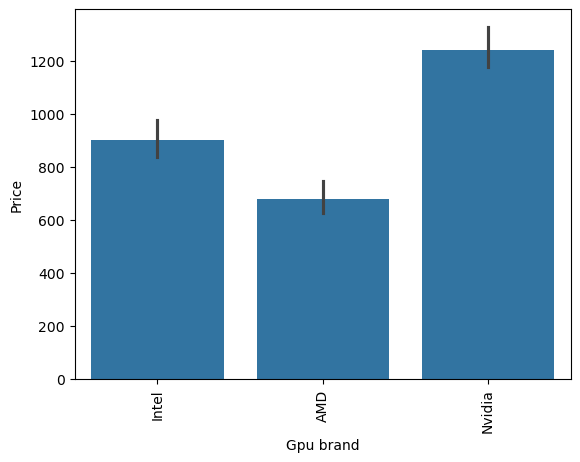

In [40]:
# Create a bar plot with the median price for each GPU brand
sns.barplot(x=df['Gpu brand'], y=df['Price'], estimator=np.median)

# Rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [41]:
# Drop the 'Gpu' column
df.drop(columns=['Gpu'], inplace=True)

# Display the first few rows of the DataFrame to verify the changes
df.head()


,Company,Product,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand
0,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Macbook Air,Ultrabook,8,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,250 G6,Notebook,8,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,MacBook Pro,Ultrabook,16,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel


In [42]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

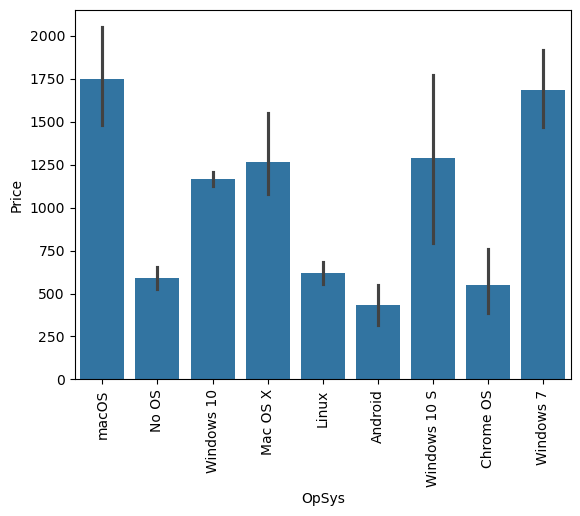

In [43]:
# Create a bar plot to show the average price for each operating system
sns.barplot(x=df['OpSys'], y=df['Price'])

# Rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


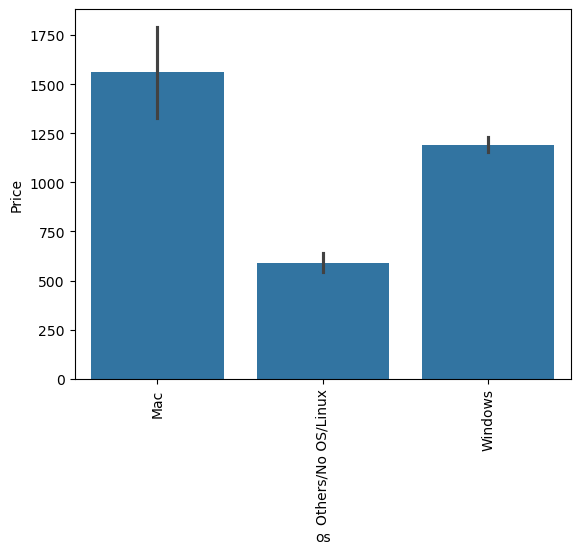

In [44]:
# Function to categorize operating systems
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

# Apply the function to the 'OpSys' column and create a new 'os' column
df['os'] = df['OpSys'].apply(cat_os)

# Create a bar plot
sns.barplot(x=df['os'], y=df['Price'], estimator=np.mean)

# Rotate the x-axis labels
plt.xticks(rotation='vertical')

# Display the plot
plt.show()


In [45]:
# Drop the 'OpSys' column from the DataFrame
df.drop(columns=['OpSys'], inplace=True)

# Display the first few rows of the DataFrame to verify the column is dropped
df.head()



,Company,Product,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
0,Apple,MacBook Pro,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Macbook Air,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,250 G6,Notebook,8,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,MacBook Pro,Ultrabook,16,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,MacBook Pro,Ultrabook,8,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


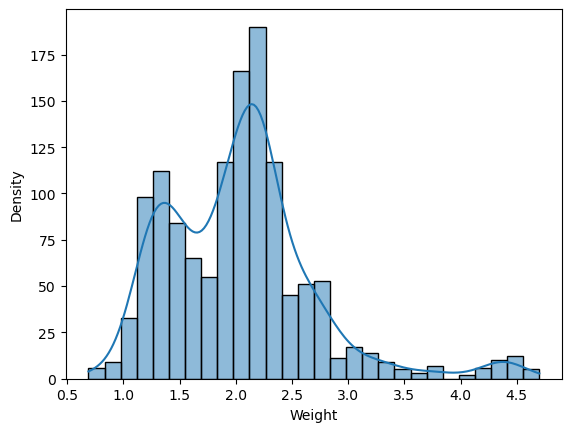

In [46]:
sns.histplot(df['Weight'], kde=True)

# Setting the labels for the axes
plt.xlabel('Weight')
plt.ylabel('Density')

# Display the plot
plt.show()


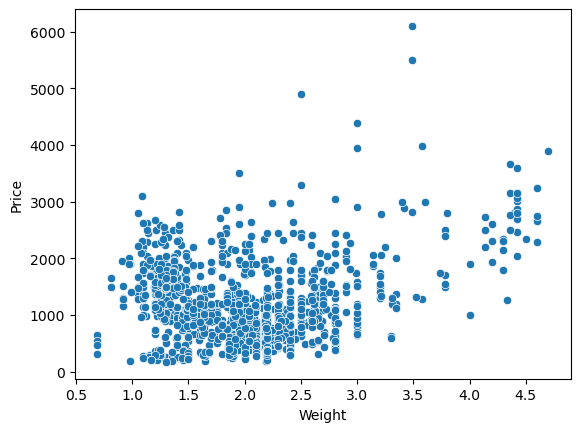

In [47]:
# Create a scatter plot to show the relationship between weight and price
sns.scatterplot(x=df['Weight'], y=df['Price'])

# Setting the labels for the axes
plt.xlabel('Weight')
plt.ylabel('Price')

# Display the plot
plt.show()


In [48]:
#df.corr()['Price']

In [49]:
# Calculate the correlation matrix
#corr_matrix = df.corr()

# Set the size of the matplotlib figure
#plt.figure(figsize=(10, 5))

# Create the heatmap
#sns.heatmap(corr_matrix, annot=True, cmap='plasma')

# Display the plot
#plt.show()


In [50]:
# Build Model

X = df.drop(columns=['Price'])
y = np.log(df['Price'])
X

,Company,Product,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
0,Apple,MacBook Pro,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Macbook Air,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,250 G6,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,MacBook Pro,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,MacBook Pro,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [51]:
y

0       7.200194
1       6.801216
2       6.354370
3       7.838915
4       7.497540
          ...   
1298    6.458338
1299    7.312553
1300    5.433722
1301    6.638568
1302    5.910797
Name: Price, Length: 1302, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd


# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create a column transformer with OneHotEncoder for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough')

# Apply the preprocessing to the dataset
X = preprocessor.fit_transform(df.drop('Price', axis=1))
y = df['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print('R-squared:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R-squared: 0.7763108263907199
MAE: 209.4341788905347


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

# Convert X_train and X_test to dense format if they are sparse
if hasattr(X_train, "toarray"):  # Checks if X_train is a sparse matrix
    X_train = X_train.toarray()
if hasattr(X_test, "toarray"):  # Checks if X_test is a sparse matrix
    X_test = X_test.toarray()
    
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

type(X_train)

numpy.ndarray

In [54]:
# We will apply one-hot encoding on the columns with these indices: [0, 1, 3, 8, 11]
# The remainder we keep as passthrough i.e. other columns will not be affected
# except the ones undergoing the transformation

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 3, 8, 11])
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score 0.6798173597506803
MAE: 229.41210745064842


C:\Users\Kevin\anaconda3\envs\Kevinpython\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [55]:
import pickle

pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))


In [56]:
# Importing Libraries

import streamlit as st
import pickle
import numpy as np

st.set_page_config(page_title="Laptop Price Predictor", page_icon="💻", layout="wide")

# import model
st.title("Laptop Price Predictor 💻")
pipe = pickle.load(open("pipe.pkl", "rb"))
df = pickle.load(open("df.pkl", "rb"))

# making 3 cols left_column, middle_column, right_column
left_column, right_column = st.columns(2)

with left_column:
    # brand input
    company = st.selectbox("Brand", df["Company"].unique())

with right_column:
    # Laptop type
    type = st.selectbox("Type", df["TypeName"].unique())

# Touchscreen
touchscreen = st.selectbox("Touchscreen", ["No", "Yes"])

# Ram_size
ram = st.selectbox("Ram (in GB)", df["Ram"].unique())

# making 3 cols left_column, middle_column, right_column
left_column, right_column = st.columns(2)

# Weight input
weight = st.number_input("Weight of laptop in kg")

# IPS display
ips = st.selectbox("IPS Display", ["No", "Yes"])

# making 3 cols left_column, middle_column, right_column
left_column, right_column = st.columns(2)

# screen size
Screen_size = st.number_input("Screen Size (in Inches)")

# cpu input
cpu = st.selectbox("CPU Brand", df["Cpu Brand"].unique())

# making 3 cols left_column, middle_column, right_column
left_column, right_column = st.columns(2)

# hdd input
hdd = st.selectbox("HDD (in GB)", [0, 128, 256, 512, 1024, 2048])

# ssd input
ssd = st.selectbox("SSD (in GB)", [0, 8, 128, 256, 512, 1024])

left_column, right_column = st.columns(2)

# resolution input
resolution = st.selectbox('Screen Resolution', ['1920x1080', '1366x768', '1600x900', '3840x2160', '3200x1800', '2880x1800', '2560x1600', '2560x1440', '2304x1440'])

# gpu input
gpu = st.selectbox("GPU Brand", df["Gpu brand"].unique())

# os input
os = st.selectbox("OS Type", df["os"].unique())

if st.button("Predict Price"):
    ppi = None
    if touchscreen == "Yes":
        touchscreen = 1
    else:
        touchscreen = 0

    if ips == "Yes":
        ips = 1
    else:
        ips = 0

    X_res = int(resolution.split("x")[0])
    Y_res = int(resolution.split('x')[1])
    ppi = (X_res ** 2 + Y_res ** 2) ** 0.5 / Screen_size
    query = np.array([company, type, ram, weight, touchscreen, ips, ppi, cpu, hdd, ssd, gpu, os])
    query = query.reshape(1, 12)
    prediction = int(np.exp(pipe.predict(query)[0]))
    exchange_rate = 0.014
    prediction_usd = round(prediction * exchange_rate, 2)
    st.title("The Predicted Price of Laptop = $" + str(prediction_usd))


2024-02-20 15:33:16.890 
  command:

    streamlit run C:\Users\Kevin\anaconda3\envs\Kevinpython\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
